<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics_february_20/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

In [9]:
import io
import requests
df = pd.read_csv('auto.csv', index_col=0)
df.head(60)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,158,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,158,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


In [10]:
df[df['wheel-base'].isnull()]

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,


In [12]:
print('Median: ', statistics.median(df['wheel-base']),
      '\nMode: ', statistics.mode(df['wheel-base']),
      '\nExpected value: ', statistics.mean(df['wheel-base']),
      '\nStandart deviation: ', max(df['wheel-base']),
      '\nDispersion: ', max(df['wheel-base']),
      '\nMinimum: ', min(df['wheel-base']),
      '\nMaximum: ', max(df['wheel-base']),
      '\nScope: ', max(df['wheel-base']) - min(df['wheel-base'])) 


Median:  97.0 
Mode:  94.5 
Expected value:  98.75658536585365 
Standart deviation:  120.9 
Dispersion:  120.9 
Minimum:  86.6 
Maximum:  120.9 
Scope:  34.30000000000001


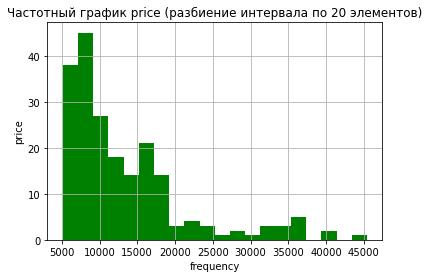

In [21]:
n, bins, patches = plt.hist(df['price'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график price (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

In [20]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


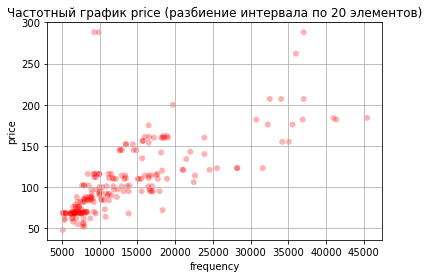

In [22]:
duration = df['price']
year = df['horsepower']
fig, ax = plt.subplots()
ax.scatter(duration,year,c= 'red', alpha=0.3, edgecolors= 'none')

plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график price (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

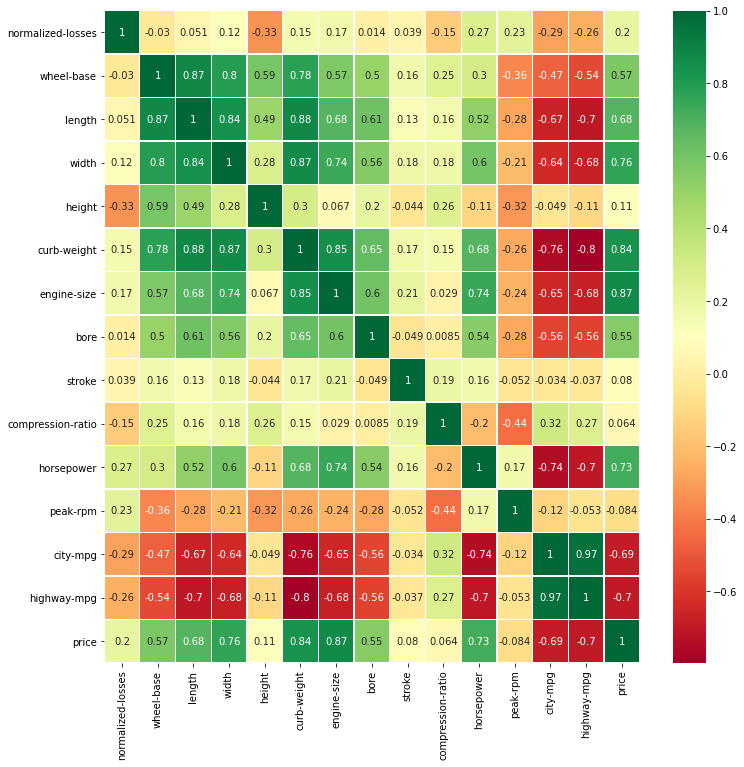

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

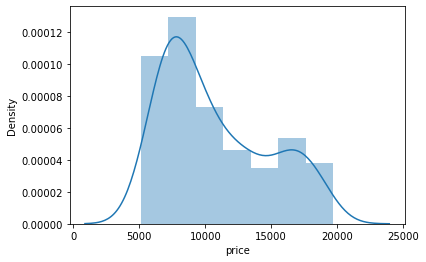

In [33]:
dfi = df.loc[df['price']<=20000]
sns.distplot(dfi['price'])



In [39]:
df[df.price< 20000].head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [46]:
from scipy.stats import kurtosis, skew

print( 'kurtosis: {}'.format( kurtosis(dfi['price']) ))
print( 'skewness: {}'.format( skew(dfi['price']) ))


kurtosis: -0.8517120230509656
skewness: 0.6326373020794779


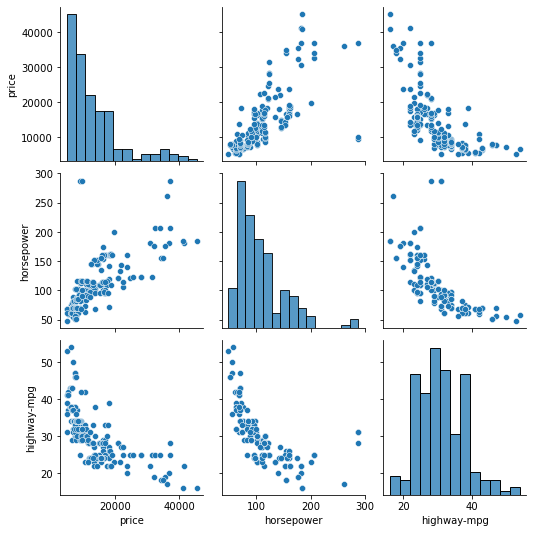

In [66]:
sns_plot = sns.pairplot(
 df[['price', 'horsepower', 'highway-mpg']])
sns_plot

Двигатели на бензине затрачивают столько же, сколько и на дизеле (no)

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


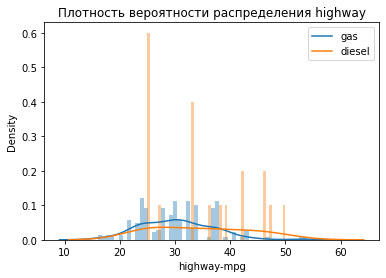

In [59]:
small_1 = df[df['fuel-type']=='gas']['highway-mpg']
small_2 = df[df['fuel-type']=='diesel']['highway-mpg']

print(stats.ttest_ind(small_1, small_2))
 
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['gas', 'diesel'])
plt.show()

Автомобили bmv и audi относятся к одной ценовой категории(no)

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


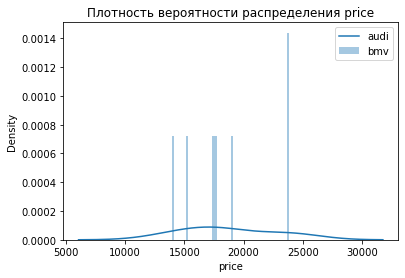

In [63]:
small_3 = df[df['make']=='audi']['price']
small_4 = df[df['make']=='bmv']['price']

print(stats.ttest_ind(small_1, small_2))
 
sns.distplot(small_3, 50)
sns.distplot(small_4, 50)
plt.title('Плотность вероятности распределения price')
plt.legend(['audi', 'bmv'])
plt.show()